In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import librosa

In [3]:
import librosa.display

In [4]:
file='baseline_notebook/training_data.csv'
df=pd.read_csv(file)

np.sum(df['Additional ID'].count())
duplica=df['Additional ID'].unique()[1:]
df_drop_dup=df[~df['Patient ID'].isin(duplica)]
dff=df_drop_dup[df_drop_dup['Recording locations:']=='AV+PV+TV+MV']
dff.Outcome.value_counts()

Normal      280
Abnormal    219
Name: Outcome, dtype: int64

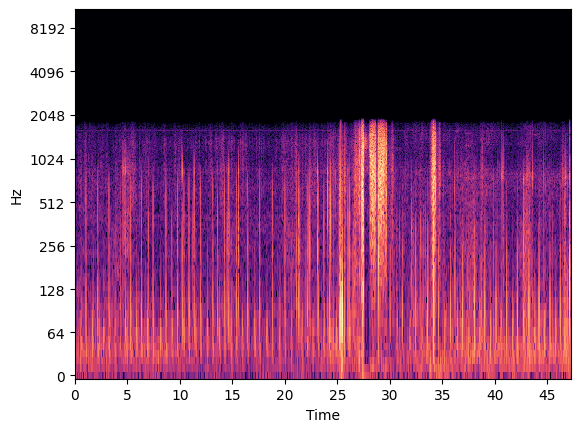

In [5]:
x_1, fs=librosa.load("../raw_data/training_data/2530_AV.wav")
#Option 1 - linear scale
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_1)), ref=np.max)
librosa.display.specshow(D, y_axis='linear', x_axis='time')
#2. Option 2 - logarithmic scale
hop_length = 1024
D_2 = librosa.amplitude_to_db(np.abs(librosa.stft(x_1, hop_length=hop_length)), ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=fs, hop_length=hop_length, x_axis='time')

In [9]:
array = librosa.load("../raw_data/training_data/2530_AV.wav", sr=22050, mono=False)


In [13]:
array[0].shape

(520380,)

In [14]:
B = np.reshape(array[0], (-1, 2))
B

array([[-0.01133176, -0.00634612],
       [ 0.00088419,  0.009571  ],
       [ 0.01862236,  0.02681366],
       ...,
       [ 0.0044159 ,  0.00304989],
       [ 0.00196083,  0.00114459],
       [ 0.00057512,  0.00021203]], dtype=float32)

In [15]:
B.shape

(260190, 2)

In [23]:
B

array([[-0.01133176, -0.00634612],
       [ 0.00088419,  0.009571  ],
       [ 0.01862236,  0.02681366],
       ...,
       [ 0.0044159 ,  0.00304989],
       [ 0.00196083,  0.00114459],
       [ 0.00057512,  0.00021203]], dtype=float32)

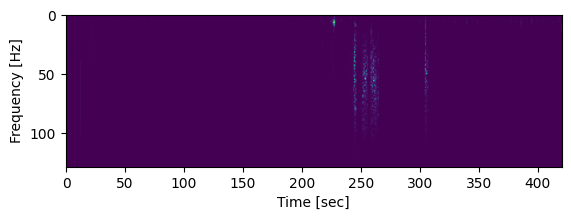

In [108]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('../raw_data/training_data/2530_AV.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

uxx = plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [109]:
from matplotlib import pyplot as plt
    
 #= plt.pcolormesh(times, frequencies, spectrogram, cmap='coolwarm')
#plt.set_aspect("equal")

#retrieve rgba values of the quadmesh object
rgbas = uxx.to_rgba(uxx.get_array().reshape(spectrogram.shape))

In [110]:
rgbas

array([[[0.267004, 0.004874, 0.329415, 1.      ],
        [0.267004, 0.004874, 0.329415, 1.      ],
        [0.267004, 0.004874, 0.329415, 1.      ],
        ...,
        [0.267004, 0.004874, 0.329415, 1.      ],
        [0.267004, 0.004874, 0.329415, 1.      ],
        [0.267004, 0.004874, 0.329415, 1.      ]],

       [[0.267004, 0.004874, 0.329415, 1.      ],
        [0.267004, 0.004874, 0.329415, 1.      ],
        [0.267004, 0.004874, 0.329415, 1.      ],
        ...,
        [0.267004, 0.004874, 0.329415, 1.      ],
        [0.269944, 0.014625, 0.341379, 1.      ],
        [0.267004, 0.004874, 0.329415, 1.      ]],

       [[0.267004, 0.004874, 0.329415, 1.      ],
        [0.267004, 0.004874, 0.329415, 1.      ],
        [0.267004, 0.004874, 0.329415, 1.      ],
        ...,
        [0.26851 , 0.009605, 0.335427, 1.      ],
        [0.267004, 0.004874, 0.329415, 1.      ],
        [0.267004, 0.004874, 0.329415, 1.      ]],

       ...,

       [[0.267004, 0.004874, 0.329415, 1. 

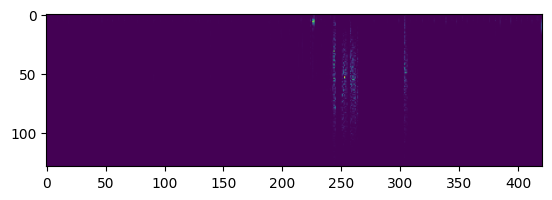

In [111]:
#rgbas[:, :, 3] = np.linspace(0, 1, spectrogram.size).reshape(spectrogram.shape)

#plot back with imshow 
qm2 = plt.imshow(rgbas)

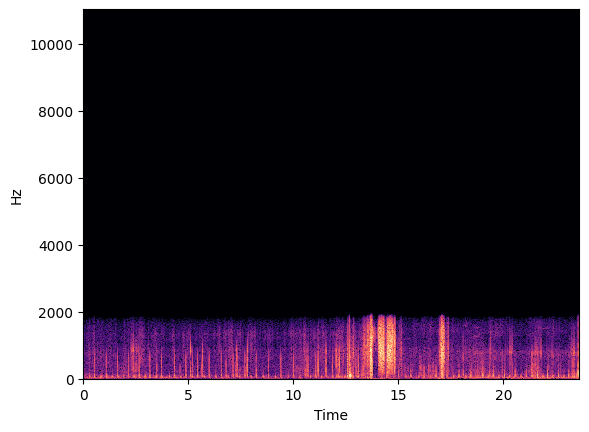

In [18]:
x_1, fs=librosa.load("../raw_data/training_data/2530_AV.wav")
#Option 1 - linear scale
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_1)), ref=np.max)
u = librosa.display.specshow(D, y_axis='linear', x_axis='time')

In [19]:
rgbas_u = u.to_rgba(u.get_array().reshape(D.shape))

In [25]:
librosa.feature.melspectrogram(y=rgbas_u, sr=sr)

/home/annagatty/.pyenv/versions/3.10.6/envs/circor/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=4
  return f(*args, **kwargs)


MemoryError: Unable to allocate 15.9 GiB for an array with shape (1025, 1017, 2052) and data type float64

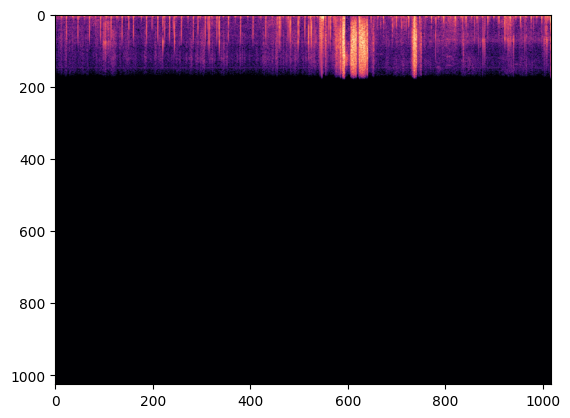

In [120]:
plt.imshow(u.to_rgba(u.get_array().reshape(D.shape)), aspect='auto')

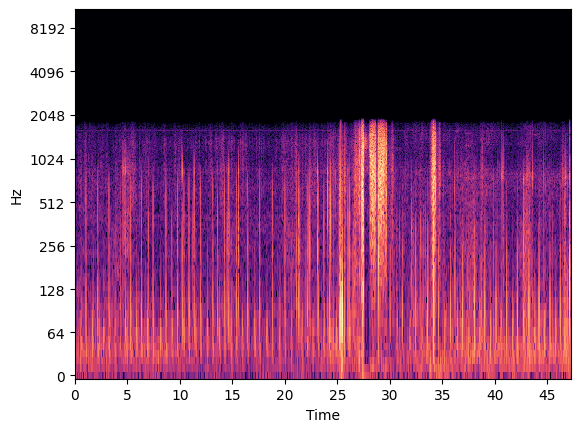

In [26]:
#2. Option 2 - logarithmic scale
hop_length = 1024
D_2 = librosa.amplitude_to_db(np.abs(librosa.stft(x_1, hop_length=hop_length)), ref=np.max)
v = librosa.display.specshow(D, y_axis='log', sr=fs, hop_length=hop_length, x_axis='time')

In [28]:
rgbas_v = v.to_rgba(v.get_array().reshape(D.shape))

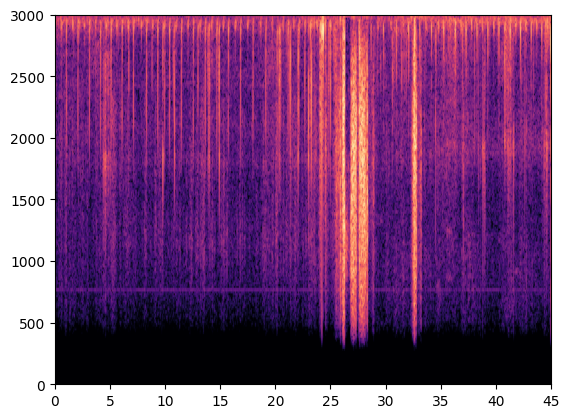

In [39]:
plt.imshow(rgbas_v[:200],extent=[0, 45, 0, 3000], aspect='auto')

In [37]:
rgbas_v.shape

(1025, 1017, 4)

In [123]:
y_stereo, sr = librosa.load('../raw_data/training_data/2530_AV.wav', mono=False)

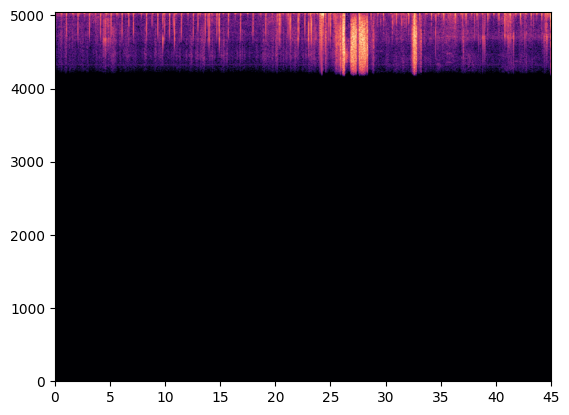

In [94]:
plt.imshow(rgbas_u,extent=[0, 45, 0, 5050], aspect='auto')

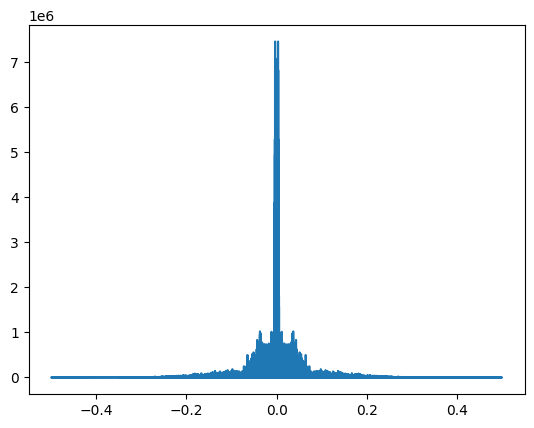

Shape of signal array : (520380,)
Shape of frequency array : (520380,)
[[-1.13317631e-02  0.00000000e+00]
 [-6.34611538e-03  1.92167262e-06]
 [ 8.84186127e-04  3.84334525e-06]
 ...
 [ 1.14458869e-03 -5.76501787e-06]
 [ 5.75116312e-04 -3.84334525e-06]
 [ 2.12033439e-04 -1.92167262e-06]]
(520380, 2)


In [125]:
x = y_stereo
y = np.sin(2 * np.pi * x)

## fourier transform
f = np.fft.fft(y)
## sample frequencies
freq = np.fft.fftfreq(len(y))
plt.plot(freq, abs(f) ** 2)
plt.show()

print( "Shape of signal array : {}".format(x.shape))

print( "Shape of frequency array : {}".format(freq.shape))

new_2D_array = np.vstack((x, freq)).T
print(new_2D_array)
print(new_2D_array.shape)

In [15]:
y_stereo_2, sr = librosa.load('../raw_data/training_data/13918_AV.wav', mono=False)

In [16]:
y_stereo_2

array([0.00041594, 0.00089627, 0.0011781 , ..., 0.00829925, 0.00498658,
       0.        ], dtype=float32)

In [4]:
import glob

In [10]:
def wav_to_2Darray(wave_path,hop_length=1024, save=False):
    x_1, fs=librosa.load(wave_path, sr=None)
    D_2 = librosa.amplitude_to_db(np.abs(librosa.stft(x_1, hop_length=hop_length)), ref=np.max)
    spectro = librosa.display.specshow(D_2, y_axis="linear", sr=fs, hop_length=hop_length, x_axis="time")
    rgbas= spectro.to_rgba(spectro.get_array().reshape(D_2.shape))*255
    rgbas=rgbas.astype('uint8')
    if save:
        wave_path = wave_path.replace('training_data','test')
        np.save(wave_path, rgbas)
    return rgbas

In [11]:
from tqdm import tqdm

In [ ]:
for file in tqdm(glob.glob('../raw_data/training_data/*.wav')):
    rgbas=wav_to_2Darray(file, hop_length=1024, save=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 3163/3163 [03:34<00:00, 14.75it/s]
